In [41]:
# importando as bibliotecas a serem utilizadas no projeto
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
#importando a base de dados com os combustiveis
combustiveis = pd.read_excel('../Dataset/Basededados.xlsx')

# importando uma base de dados com o valor da inflação acumulada durante o periodo da base de dados ( mesma quantidade de linhas)
inflacao = pd.read_excel('../Dataset/Inflacao.xlsx').replace('%', '').replace(',', '.')

In [43]:
# Convertendo as colunas de data para o formato apropriado
combustiveis['Data da Coleta'] = pd.to_datetime(combustiveis['Data da Coleta'])
inflacao['Data da Coleta'] = pd.to_datetime(inflacao['Data da Coleta'])

In [44]:
# Filtrando somente as colunas que serão necessárias para a análise
combustiveis = combustiveis.reset_index()
combustiveis = combustiveis[['Data da Coleta', 'Valor de Venda']]

In [45]:
# Agrupando os dados de preço dos combustíveis por mês
combustiveis.set_index('Data da Coleta', inplace=True)
combustiveis_mensal = combustiveis.groupby(pd.Grouper(freq='M')).mean()

In [48]:
# Filtrando os dados de inflação para o mesmo período
inflacao_filtrada = inflacao[inflacao['Data da Coleta'].isin(combustiveis_mensal.index)]

In [49]:
# Unindo os dados de preço dos combustíveis com os dados de inflação
dados_combustiveis_inflacao = pd.merge(combustiveis_mensal, inflacao_filtrada, on='Data da Coleta')

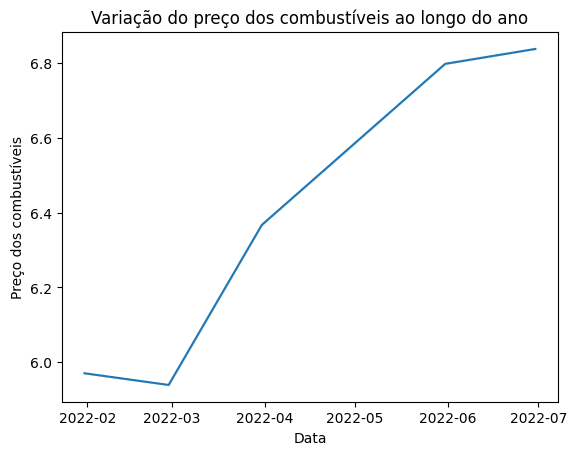

In [50]:
# Criando um gráfico de linha para comparar o preço dos combustíveis ao longo do ano
sns.lineplot(x='Data da Coleta', y='Valor de Venda', data=dados_combustiveis_inflacao)
plt.xlabel('Data')
plt.ylabel('Preço dos combustíveis')
plt.title('Variação do preço dos combustíveis ao longo do ano')
plt.savefig('nome_do_arquivo1.png')

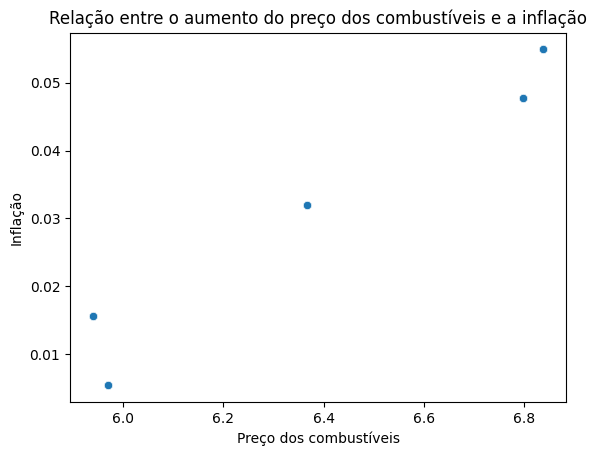

In [51]:
# Criando um gráfico de dispersão para visualizar a relação entre o aumento do preço dos combustíveis e a inflação
sns.scatterplot(x='Valor de Venda', y='Inflacao Acumulada', data=dados_combustiveis_inflacao)
plt.xlabel('Preço dos combustíveis')
plt.ylabel('Inflação')
plt.title('Relação entre o aumento do preço dos combustíveis e a inflação')
plt.savefig('nome_do_arquivo2.png')

In [40]:
# Exibindo as primeiras linhas do DataFrame
display(dados_combustiveis_inflacao)

,Data da Coleta,Valor de Venda,Inflacao Acumulada
0,2022-01-31,5.970239,0.0054
1,2022-01-31,5.970239,0.0054
2,2022-01-31,5.970239,0.0054
3,2022-01-31,5.970239,0.0054
4,2022-01-31,5.970239,0.0054
...,...,...,...
23644,2022-06-30,6.838352,0.0549
23645,2022-06-30,6.838352,0.0549
23646,2022-06-30,6.838352,0.0549
23647,2022-06-30,6.838352,0.0549


In [52]:
# Obtendo informações sobre as colunas do DataFrame
display(dados_combustiveis_inflacao.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23649 entries, 0 to 23648
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Data da Coleta      23649 non-null  datetime64[ns]
 1   Valor de Venda      23649 non-null  float64       
 2   Inflacao Acumulada  23649 non-null  float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 554.4 KB


None

In [53]:
# Obtendo estatísticas descritivas das colunas numéricas
display(dados_combustiveis_inflacao.describe())

,Data da Coleta,Valor de Venda,Inflacao Acumulada
count,23649,23649.000000,23649.000000
mean,2022-04-12 10:06:57.404541440,6.377212,0.030926
min,2022-01-31 00:00:00,5.938988,0.005400
25%,2022-02-28 00:00:00,5.938988,0.015600
50%,2022-03-31 00:00:00,6.367336,0.032000
75%,2022-05-31 00:00:00,6.798474,0.047800
max,2022-06-30 00:00:00,6.838352,0.054900
std,NaN,0.400385,0.018659


In [54]:
# Verificando a correlação entre as colunas numéricas
display(dados_combustiveis_inflacao.corr())

,Data da Coleta,Valor de Venda,Inflacao Acumulada
Data da Coleta,1.000000,0.968353,0.992178
Valor de Venda,0.968353,1.000000,0.974517
Inflacao Acumulada,0.992178,0.974517,1.000000


In [55]:
# calculando medidas de tendência centrais
media_combustiveis = combustiveis['Valor de Venda'].mean()
media_inflacao = inflacao['Inflacao Acumulada'].mean()

moda_combustiveis = combustiveis['Valor de Venda'].mode().values[0]
moda_inflacao = inflacao['Inflacao Acumulada'].mode().values[0]

mediana_combustiveis = combustiveis['Valor de Venda'].median()
mediana_inflacao = inflacao['Inflacao Acumulada'].median()


In [56]:
# Exibindo as estatísticas descritivas

print("Estatísticas Descritivas - Preço dos Combustíveis:")
print("Média:", media_combustiveis)
print("Moda:", moda_combustiveis)
print("Mediana:", mediana_combustiveis)

print("\nEstatísticas Descritivas - Inflação:")
print("Média:", media_inflacao)
print("Moda:", moda_inflacao)
print("Mediana:", mediana_inflacao)

Estatísticas Descritivas - Preço dos Combustíveis:
Média: 6.457415228625826
Moda: 6.99
Mediana: 6.65

Estatísticas Descritivas - Inflação:
Média: 0.034345344185378844
Moda: 0.0549
Mediana: 0.0429
